Step 1: Assessing & Preparing the Data
===
Import Data, Assess it, Clean it.

In [111]:
# import relevant libraries for cleaning and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data and check it
df = pd.read_csv("netflix-rotten-tomatoes-metacritic-imdb.csv")
df.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,NaN,NaN
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon",...,2021-03-04,NaN,https://www.netflix.com/watch/81305978,https://www.imdb.com/title/tt8945942,"Trapped in a frozen car during a blizzard, a p...",1720.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BODM2MD...,https://www.youtube.com/watch?v=0RvV7TNUlkQ,YouTube
3,ANNE+,Drama,"TV Dramas,Romantic TV Dramas,Dutch TV Shows",Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81336456,https://www.imdb.com/title/tt6132758,"Upon moving into a new place, a 20-something r...",1147.0,https://occ-0-1489-1490.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BNWRkMz...,NaN,NaN
4,Moxie,"Animation, Short, Drama","Social Issue Dramas,Teen Movies,Dramas,Comedie...",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,...,2021-03-04,NaN,https://www.netflix.com/watch/81078393,https://www.imdb.com/title/tt2023611,Inspired by her moms rebellious past and a con...,63.0,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BODYyNW...,NaN,NaN


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  15480 non-null  object 
 1   Genre                  13770 non-null  object 
 2   Tags                   15413 non-null  object 
 3   Languages              13526 non-null  object 
 4   Series or Movie        15480 non-null  object 
 5   Hidden Gem Score       13379 non-null  float64
 6   Country Availability   15461 non-null  object 
 7   Runtime                15479 non-null  object 
 8   Director               10772 non-null  object 
 9   Writer                 11150 non-null  object 
 10  Actors                 13555 non-null  object 
 11  View Rating            8456 non-null   object 
 12  IMDb Score             13381 non-null  float64
 13  Rotten Tomatoes Score  6382 non-null   float64
 14  Metacritic Score       4336 non-null   float64
 15  Aw

Immediate things to address:
- Genre, Tags, Languages etc all 'stuck' as messy strings instead of categories/single values.
- Few columns can be set to categories, such as series or movie, runtime.
- Some irrelevant columns droppable.
- Release date and boxoffice need formatting as datetime and integers

Slim down the df, removing irrelevant columns:

In [113]:
# drop unhelpful columns/those unlikely to be significant:
df = df.drop(columns=['Director', 'Writer', 'Actors', 'Production House', 'Netflix Link', 'IMDb Link',
'Summary','Image', 'Poster', 'TMDb Trailer', 'Trailer Site'])

In [114]:
df.head(3)

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,"$2,122,065",12 Dec 2008,2021-03-04,205926.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,"$70,632",08 May 2020,2021-03-04,2838.0
2,Centigrade,"Drama, Thriller",Thrillers,English,Movie,6.4,Canada,1-2 hour,Unrated,4.3,NaN,46.0,NaN,NaN,"$16,263",28 Aug 2020,2021-03-04,1720.0


Rename Cols for convenience and chart visibility:

In [133]:
# simplify names for chart visibility & convenience
df = df.rename(columns={'IMDb Score' : 'IMDB_Score', 'Series or Movie' : 'Series/Movie', 'Hidden Gem Score' : 'HG_Score', 'Country Availability' : 'Countries', 'Rotten Tomatoes Score' : 'RT_Score', 'Metacritic Score' : 'MC_Score', 'Awards Received' : 'Award_Rec',
       'Awards Nominated For' : 'Award_Nom', 'Netflix Release Date' : 'NF_Release', 'Release Date' : 'Release', 'IMDb Votes' : 'IMDB_Votes'})
df.columns

Index(['Title', 'Genre', 'Tags', 'Languages', 'Series/Movie', 'HG_Score',
       'Countries', 'Runtime', 'IMDB_Score', 'RT_Score', 'MC_Score',
       'Award_Rec', 'Award_Nom', 'Boxoffice', 'Release', 'NF_Release',
       'IMDB_Votes'],
      dtype='object')

In [116]:
for i in df.columns:
    null_rate = round(df[i].isna().sum() / len(df) * 100)
    pd.Series(null_rate, index=[i])
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Genre null rate: 11%
Languages null rate: 13%
HG_Score null rate: 14%
View Rating null rate: 45%
IMDB_Score null rate: 14%
RT_Score null rate: 59%
MC_Score null rate: 72%
Award_Rec null rate: 61%
Award_Nom null rate: 51%
Boxoffice null rate: 74%
Release null rate: 14%
IMDb Votes null rate: 14%


That's a lot of nulls for some - their usefulness will be situational, but particularly if comparing overall ratings, MC_Score being more than 70% null will simply be bad data.

Going to use missingno for better comparison:

<Axes: >

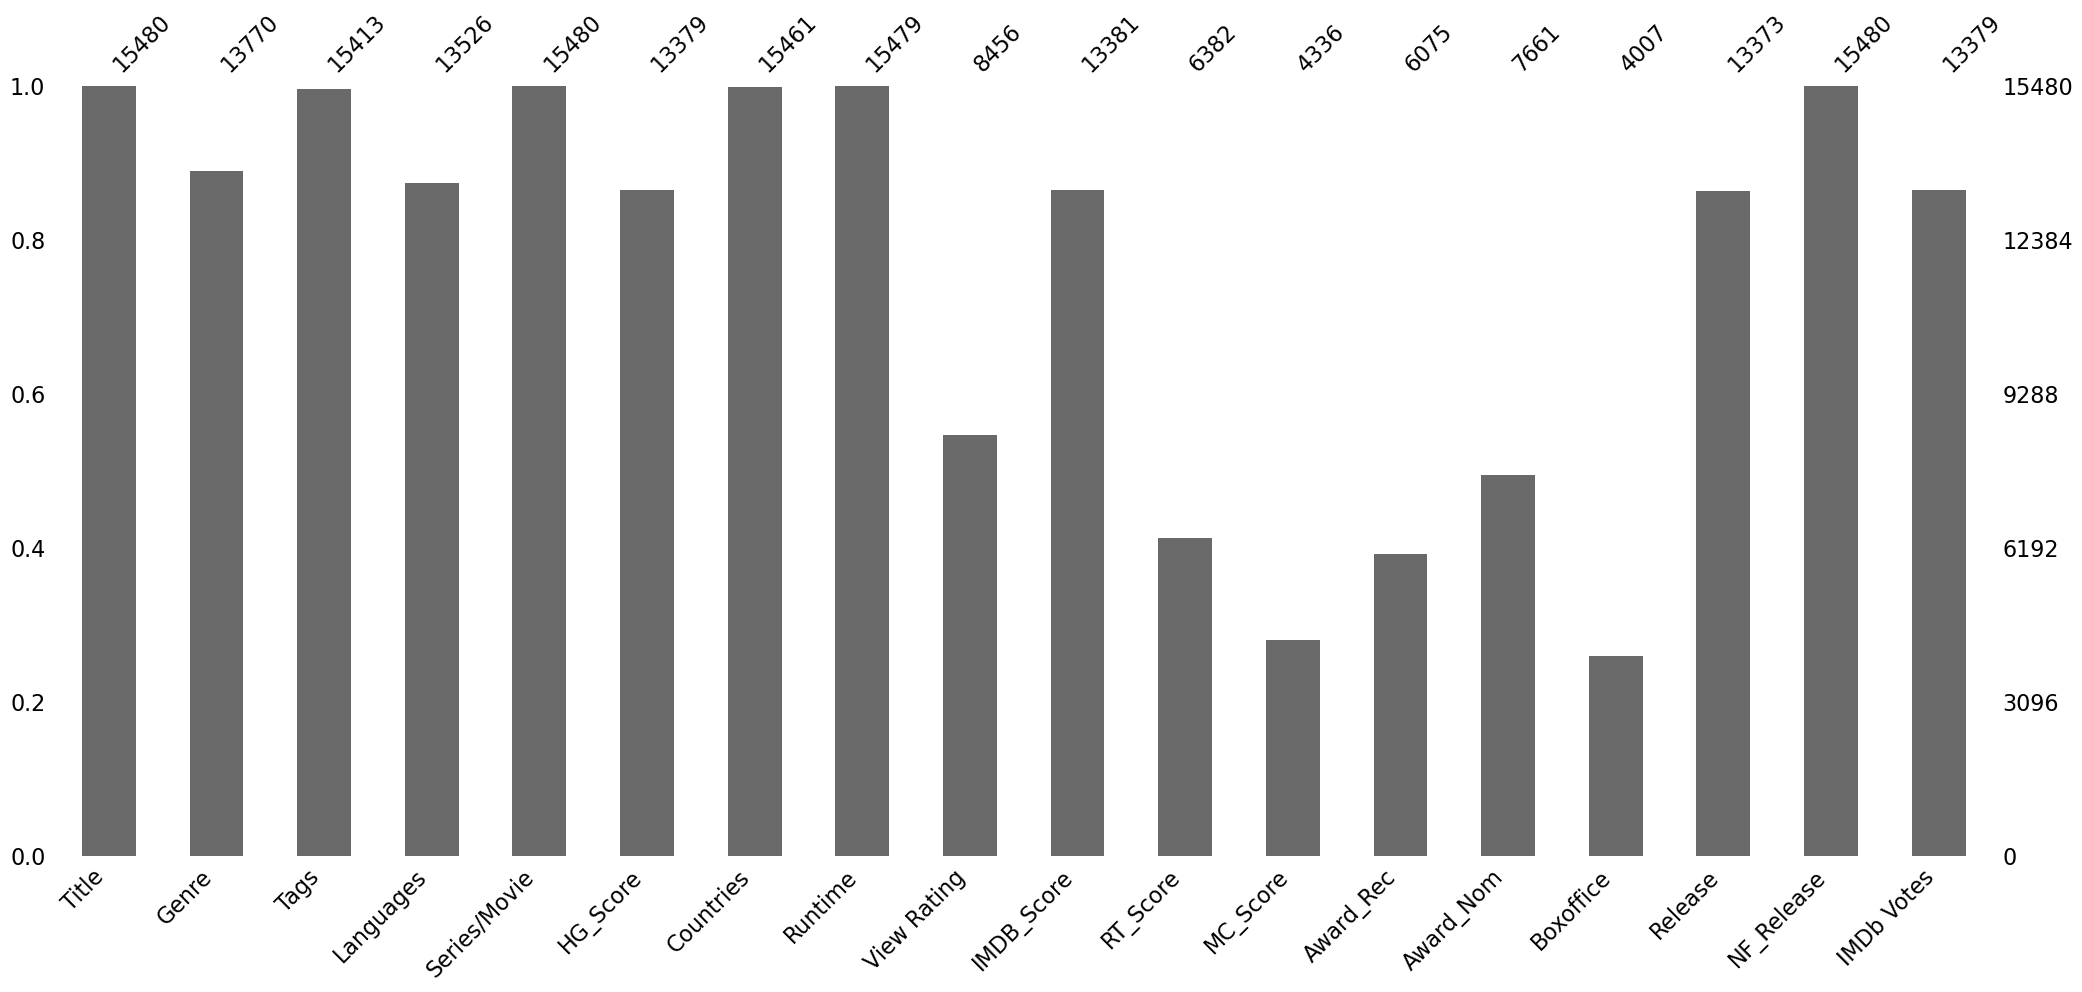

In [117]:
import missingno as msno

msno.bar(df)

A lot of missing values in the key variables of ratings/scores, so the key question: are they missing randomly, or is there a pattern to them?

MC_score and Boxoffice around 2/3rds null, so need to be careful with how they're dealt with. Too many missing values to impute, even if rows with no IMDB score are dropped (~50% of which are still nulls for RT score).

At least, can explore "of those with MC/RT scores, how do they correlate with IMDB ratings, etc."

1st, see if there's any patterns to the nulls:

In [118]:
# Explore what the null IMDb rows look like against other ratings etc
IMDbna = df[df['IMDB_Score'].isna()]
IMDbna

,Title,Genre,Tags,Languages,Series/Movie,HG_Score,Countries,Runtime,View Rating,IMDB_Score,RT_Score,MC_Score,Award_Rec,Award_Nom,Boxoffice,Release,NF_Release,IMDb Votes
208,The Strongest,Drama,"Sports Movies,Dramas,Sports Dramas,Classic Mov...",NaN,Movie,NaN,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Feb 1920,2021-02-04,NaN
220,Firefly Lane,"Drama, Romance","TV Dramas,Romantic TV Dramas,US TV Shows,TV Sh...",English,Series,NaN,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",< 30 minutes,TV-MA,NaN,NaN,NaN,NaN,NaN,NaN,03 Feb 2021,2021-02-04,NaN
246,Le Tournoi,Documentary,"Dramas,French",NaN,Movie,NaN,France,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01,NaN
248,She is King,Musical,"African Films,Dramas,Comedies,Musicals,Music &...",English,Movie,NaN,South Africa,1-2 hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01 Jun 2017,2021-01-30,NaN
249,How to Eliminate My Teacher,"Mystery, Thriller","Drama Programmes,Japanese TV Programmes,TV Thr...",Japanese,Series,NaN,"Malaysia,Hong Kong,Thailand,Singapore",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31 Dec 2020,2021-01-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,DreamWorks Short Stories,NaN,"TV Comedies,Kids TV,TV Programmes,TV Cartoons,...",NaN,Series,NaN,"United Kingdom,France,Switzerland,Belgium,Neth...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15472,DreamWorks Shrek Stories,NaN,"TV Comedies,Kids TV,TV Programmes,Animal Tales...",NaN,Series,NaN,"Belgium,United Kingdom,France,Switzerland,Neth...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15474,Nijntje and Vriendjes,NaN,"Kids TV,TV Programmes,Dutch TV Shows,TV Shows ...",NaN,Series,NaN,"Belgium,Netherlands",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15475,K-POP Extreme Survival,NaN,"TV Dramas,TV Programmes,TV Comedies,Romantic T...",NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN


Interestingly looks like could be a lot of the null IMDb rows are also null elsewhere.

<Axes: >

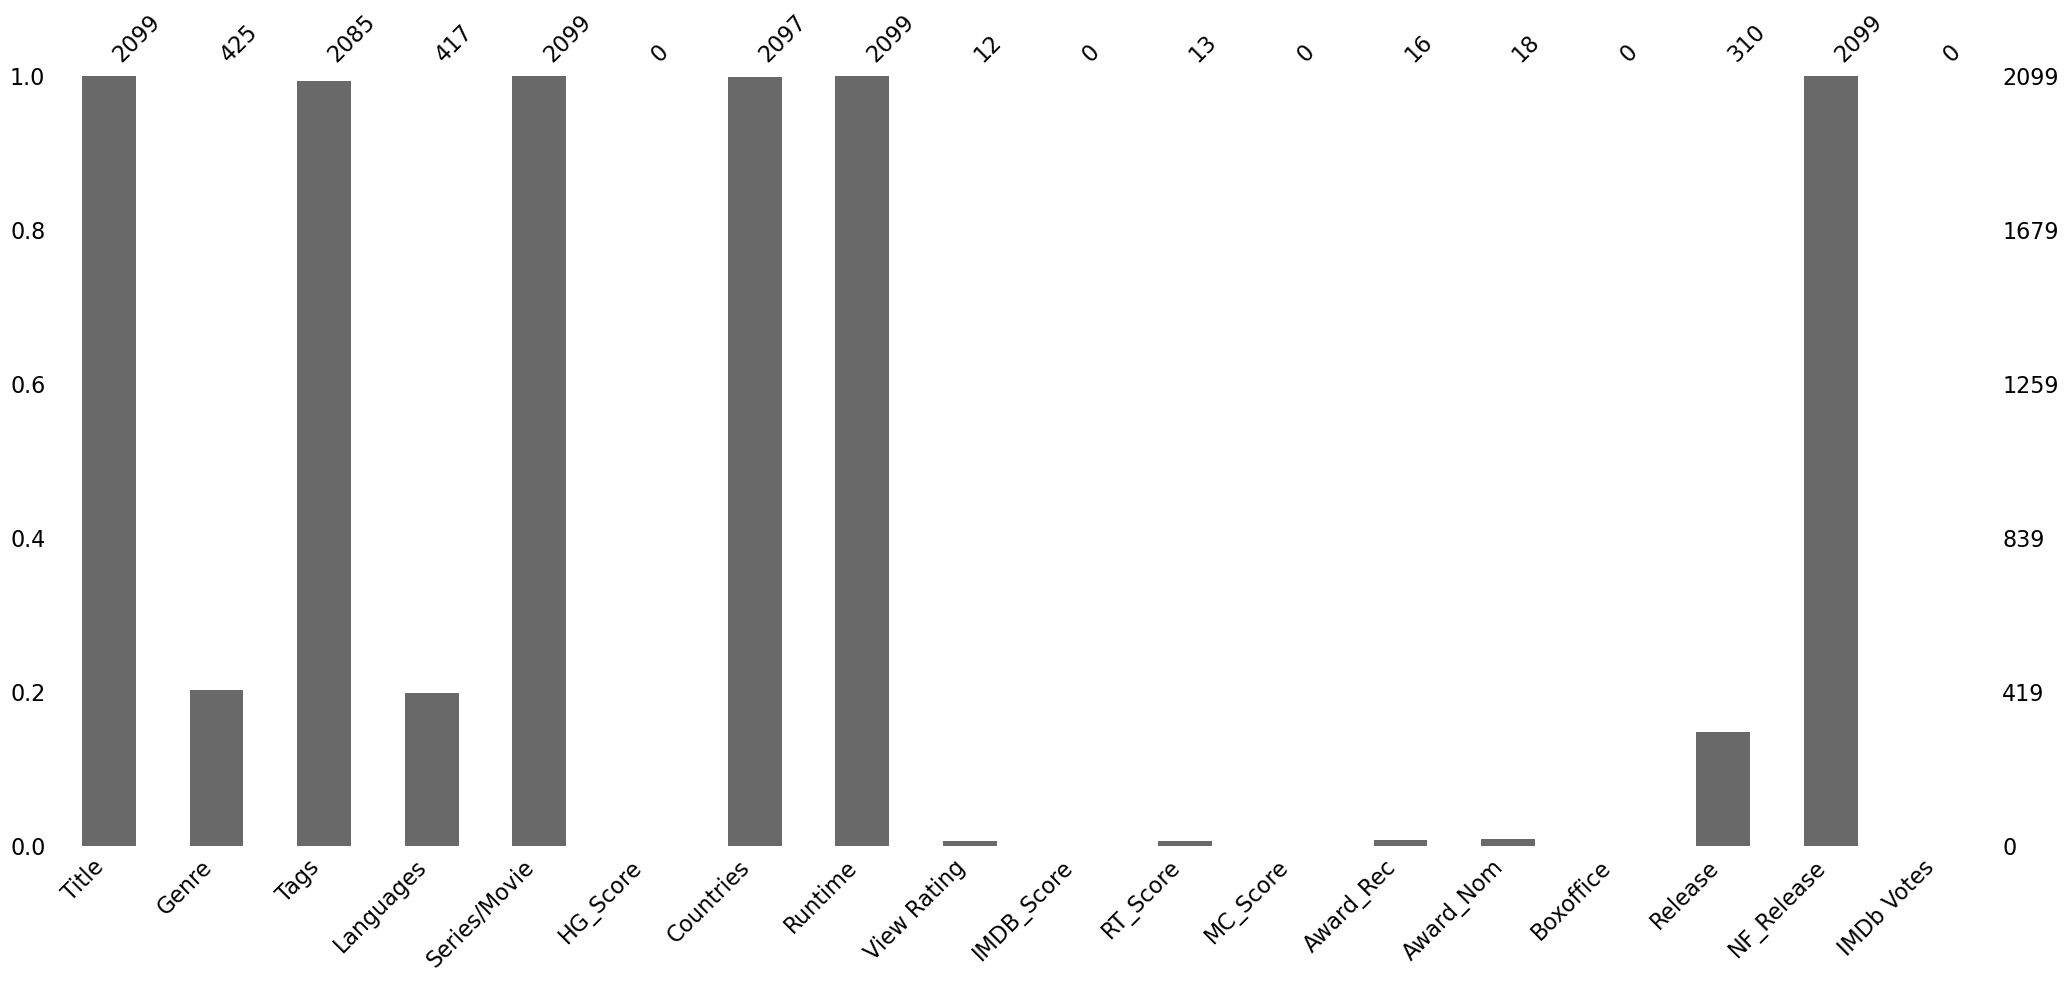

In [119]:
msno.bar(IMDbna)

Bingo! Since the empty IMDb rows are generally empty, not worth keeping them at all.

In [120]:
df.dropna(subset=['IMDB_Score'], inplace=True)

<Axes: >

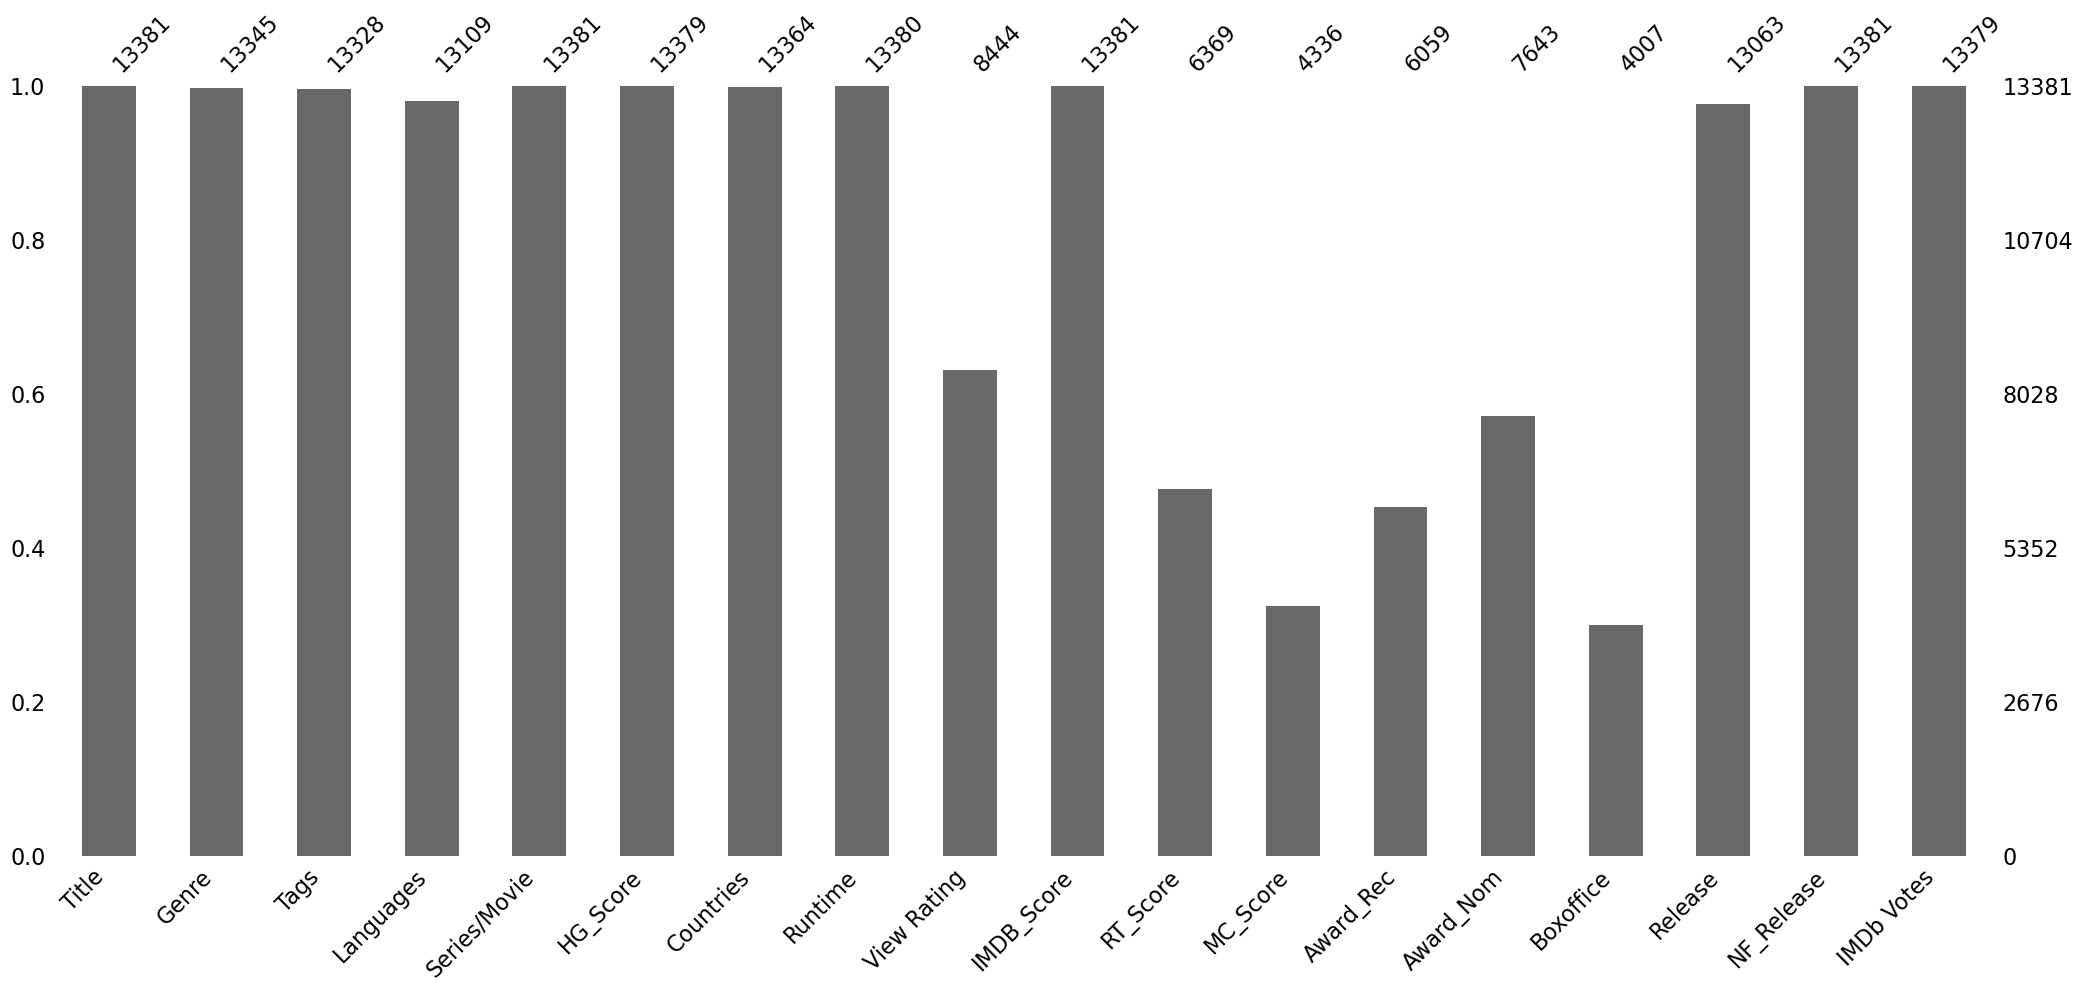

In [121]:
msno.bar(df)

Given there's still a substantial amount of missing scores for all but IMDb, I will do a little online research into titles with no RT/MC scores.

In [122]:
df[df['RT_Score'].isna()].sample(5)

,Title,Genre,Tags,Languages,Series/Movie,HG_Score,Countries,Runtime,View Rating,IMDB_Score,RT_Score,MC_Score,Award_Rec,Award_Nom,Boxoffice,Release,NF_Release,IMDb Votes
8286,The Epic Tales of Captain Underpants,"Animation, Short, Action, Adventure, Comedy, F...","TV Cartoons,TV Shows,Kids TV,Comic Book & Supe...",English,Series,8.0,"Lithuania,Spain,Canada,Hong Kong,United Kingdo...",< 30 minutes,TV-Y7,6.7,NaN,NaN,NaN,1.0,NaN,NaN,2018-07-13,639.0
7114,Closer to Heaven,"Drama, Romance","Korean Drama Movies,Romantic Movies,Dramas,Rom...",Korean,Movie,8.2,South Korea,> 2 hrs,NaN,6.6,NaN,NaN,5.0,1.0,NaN,24 Sep 2009,2018-10-01,291.0
6642,Qualquer Gato Vira-Lata 2,"Comedy, Romance",NaN,"Portuguese, Spanish",Movie,7.7,Brazil,1-2 hour,NaN,5.6,NaN,NaN,NaN,NaN,NaN,04 Jun 2015,2018-12-04,291.0
14087,LOL,Drama,"International Movies,Romantic Comedies,French ...",English,Movie,8.6,Germany,1-2 hour,NaN,7.2,NaN,NaN,NaN,NaN,NaN,15 Nov 2008,2015-04-14,5.0
6453,Selection Day,Sport,"TV Dramas,Indian TV Shows,Teen TV Shows,TV Sho...",NaN,Series,7.8,"Slovakia,Lithuania,Brazil,Israel,Mexico,Spain,...",< 30 minutes,NaN,7.4,NaN,NaN,NaN,NaN,NaN,28 Dec 2018,2018-12-28,1841.0


Following a little online research, it seems the missing scores are for shows with few votes on RT/MC, but I may explore trends further later.

Dealing with Awards nulls: it is likely they are just for shows with no awards/noms.

In [123]:
df.Award_Rec.unique()

array([ 74.,   1.,  nan,   2.,   7., 112.,  26.,  46.,   3.,  23.,   9.,
        10.,   4.,   5.,  19.,  34.,  12.,   8.,  25.,  54.,   6.,  13.,
        31.,  16.,  11.,  40.,  37.,  14., 232.,  32.,  58.,  27.,  43.,
        22.,  70.,  21.,  20.,  28.,  18.,  15.,  64.,  44.,  30.,  60.,
       123.,  96., 124.,  17., 104.,  47.,  56., 300.,  35.,  38.,  57.,
        29.,  48.,  86.,  36.,  61.,  69.,  24., 139.,  55.,  77., 127.,
       137.,  75., 132.,  39., 107.,  95.,  53.,  79.,  52.,  97.,  33.,
        42.,  51., 251., 151., 129., 116.,  66., 109.,  49., 242.,  68.,
        59., 229., 102., 105.,  76.,  65.,  98.,  41.,  90.,  45.,  73.,
       241.,  83.,  82.,  50., 194.,  72., 239.,  85., 134.,  80., 173.,
        67., 156., 119.,  63., 142.,  84.,  89., 158.,  87., 164., 133.,
       111., 161., 117.,  91., 126., 210., 154.,  78., 114., 152.])

In [124]:
# safe to assume no entry = 0 awards.
df.fillna({'Award_Nom':0,'Award_Rec':0}, inplace=True)
df['Award_Nom'].value_counts()[0]

5738

In [125]:
df.fillna({'Genre':"-", 'Languages':"-"}, inplace=True)
df['Genre'].isna().sum()

0

I'm not interested in any analysis of view ratings, as I don't think there's anything particularly useful to be gleaned there, especially given the high null-count.

In [127]:
df.drop(columns='View Rating', inplace=True)

<Axes: >

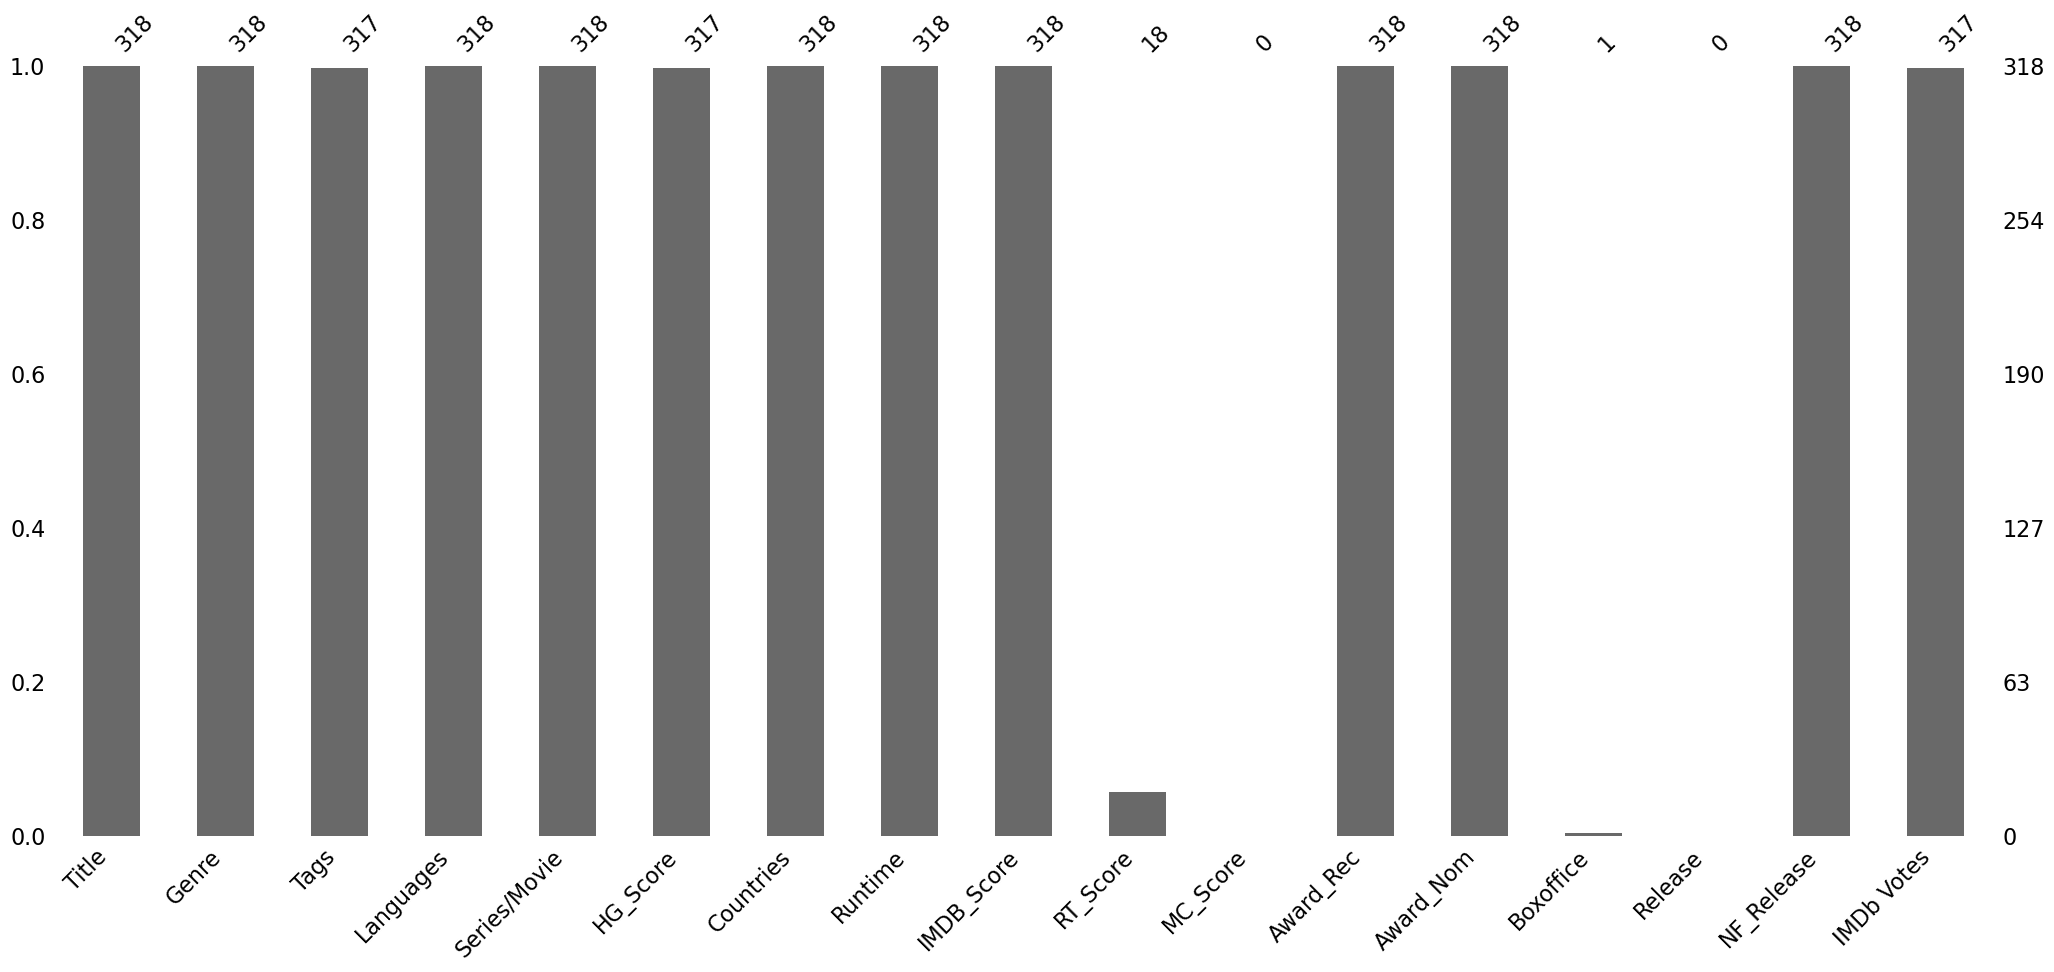

In [128]:
msno.bar(df[df['Release'].isna()])

Again, it seems the null rows for release dates are broadly null, so can be dropped to avoid undue bias.
(Note to self, find better data in future!)

In [131]:
df.dropna(subset=['Release'], inplace=True)

In [134]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    pd.Series(null_rate, index=[i])
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

Tags null rate: 0.4%
HG_Score null rate: 0.01%
Countries null rate: 0.13%
Runtime null rate: 0.01%
RT_Score null rate: 51.38%
MC_Score null rate: 66.81%
Boxoffice null rate: 69.33%
IMDB_Votes null rate: 0.01%


Tidy up the last <1% for convenience:

In [135]:
df.dropna(subset=['Tags', 'HG_Score', 'Countries', 'Runtime', 'IMDB_Votes'], inplace=True)

So just nulls for RT and MC with patterns tbc, and the Boxoffice nulls. For one thing, only films can have a boxoffice value! So need to set dtypes first, to categorise and check.

Setting dtypes:

In [137]:
unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
4,Series/Movie,2
7,Runtime,4
8,IMDB_Score,82
5,HG_Score,93
10,MC_Score,95
9,RT_Score,101
11,Award_Rec,131
12,Award_Nom,200
3,Languages,1399
1,Genre,1718


In [138]:
df['Runtime'].unique()

array(['< 30 minutes', '1-2 hour', '> 2 hrs', '30-60 mins'], dtype=object)

In [151]:
# can immediately see top two are worth setting as categories (for speed and other operations)
df[['Series/Movie', 'Runtime']] = df[['Series/Movie', 'Runtime']].astype('category')

In [176]:
df['Series/Movie'].value_counts()

Series/Movie
Movie     10072
Series     2920
Name: count, dtype: int64

That's a lot more than the ~4000 boxoffice nulls!

In [ ]:


df['Boxoffice'] = df['Boxoffice'].astype(Int)

In [162]:
df['Release'] = pd.to_datetime(df['Release'])
df['NF_Release'] = pd.to_datetime(df['NF_Release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12992 entries, 0 to 15473
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         12992 non-null  object        
 1   Genre         12992 non-null  object        
 2   Tags          12992 non-null  object        
 3   Languages     12992 non-null  object        
 4   Series/Movie  12992 non-null  category      
 5   HG_Score      12992 non-null  float64       
 6   Countries     12992 non-null  object        
 7   Runtime       12992 non-null  category      
 8   IMDB_Score    12992 non-null  float64       
 9   RT_Score      6315 non-null   float64       
 10  MC_Score      4314 non-null   float64       
 11  Award_Rec     12992 non-null  float64       
 12  Award_Nom     12992 non-null  float64       
 13  Boxoffice     3982 non-null   object        
 14  Release       12992 non-null  datetime64[ns]
 15  NF_Release    12992 non-null  datetime64[

In [172]:
df['Boxoffice'] = df['Boxoffice'].str.replace('$,','')


ValueError: Cannot mask with non-boolean array containing NA / NaN values

Now the tricky part: turning those messy strings into retrievable unique values (e.g., "Sci Fi" or "Animation")...

In [142]:
df.Genre.unique()

array(['Crime, Drama, Fantasy, Horror, Romance', 'Comedy',
       'Drama, Thriller', ..., 'Action, Animation, Comedy, Romance',
       'Animation, Action, Adventure, Fantasy, Sport, Thriller',
       'Adventure, Drama, Fantasy, Romance, Thriller'], dtype=object)

In [143]:
df.Genre.sample(5)

4292                              Romance
14523                       Comedy, Crime
14488    Comedy, Family, Fantasy, Romance
11128                              Comedy
3393                                Drama
Name: Genre, dtype: object

In [145]:
unique_values = []

for i in df.Genre:
    uniques = str(i).split(', ')
    for x in uniques:
        if x not in unique_values:
               unique_values.append(x)
unique_values


['Crime',
 'Drama',
 'Fantasy',
 'Horror',
 'Romance',
 'Comedy',
 'Thriller',
 'Animation',
 'Short',
 'Family',
 'Mystery',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Biography',
 'Sport',
 'War',
 'History',
 'Documentary',
 'Film-Noir',
 'Music',
 'Musical',
 'Game-Show',
 'Western',
 '-',
 'Reality-TV',
 'Talk-Show',
 'News',
 'Adult']

Ideal would be to take the unique names from a column, and then create a dict pairing each unique name as a key to a list of the Titles' indexes in df...

E.g. list of unique genres -> genre_dict: {genreA : [film1, film3, filmN...], genreB : [film2, film3, filmN], ...}
Easy enough to make a dict of the unique_values, and append each title/index to the key

The key endgoal being the ability to use genre_dict to search/visualise the main df for ratings: plotting genres on x, ratings on y, and values taken from... 

In [146]:
#for each value in the col, want:
#any new+unique value, and to add it to a list of the unique names for that col.
# Then, with a clear list of unique values, can group data; e.g.,
# "If col contains 'Sci-Fi' then add to Sci-Fi_series"
def unique_finder(column, sep=', '):
    '''
    Nifty lil function that takes a column with messy strings as values,
    and returns a list of the unique values in the column that are
    separated by the designated character.
    
    Parameters
    ----------
    column: pandas series
        column containing strings to be iterated over
    sep: string, optional
        the character(s) used to split the unique values
    
    Returns
    -------
    unique_values: list
        a list of the unique values in the column
    '''
    unique_values = []
    for i in column:
        uniques = str(i).split(sep)
        for x in uniques:
            if x not in unique_values:
               unique_values.append(x)
    return unique_values


In [147]:
languages = unique_finder(df.Languages)
languages

['Swedish',
 'Spanish',
 'English',
 'Turkish',
 'Thai',
 'Polish',
 'German',
 'Norwegian',
 'Scanian',
 'Sanskrit',
 'Japanese',
 'Hindi',
 'Cantonese',
 'Mandarin',
 'French',
 'Italian',
 'Breton',
 'Korean',
 'Tibetan',
 'Russian',
 'Chinese',
 'Aboriginal',
 '-',
 'Danish',
 'Czech',
 'Ukrainian',
 'Romanian',
 'Hungarian',
 'Swiss German',
 'Latin',
 'Greek',
 'Vietnamese',
 'Kannada',
 'Luxembourgish',
 'Portuguese',
 'Min Nan',
 'Bengali',
 'Arabic',
 'None',
 'Yiddish',
 'Filipino',
 'Malayalam',
 'Romany',
 'American Sign Language',
 'Quechua',
 'Dutch',
 'Khmer',
 'Indonesian',
 'Tagalog',
 'Persian',
 'Basque',
 'Hebrew',
 'Urdu',
 'Gallegan',
 'Finnish',
 'Malay',
 'Sign Languages',
 'Georgian',
 'Tamil',
 'Zulu',
 'Southern Sotho',
 'Tswana',
 'Inuktitut',
 'Mongolian',
 'Serbian',
 'Amharic',
 'Berber languages',
 'Japanese Sign Language',
 'Swahili',
 'Hokkien',
 'Sicilian',
 'Neapolitan',
 'Bosnian',
 'Latvian',
 'Pushto',
 'Wolof',
 'Yoruba',
 'Telugu',
 'Nama',
 'Ku

In [149]:
countries = unique_finder(df['Countries'])
tags = unique_finder(df['Tags'])
genres = unique_finder(df['Genre'])

In [26]:
df_num = df.select_dtypes(exclude=['object','category'])
df_cat = df.select_dtypes(exclude='float64')

Step 2: Visualisation; identifying and exploring patterns
----
Some initial ideas for analysis:
- If there are any common predictors of high ratings; i.e., what makes a higher score more likely from respective sites (*if* the current data has sufficient info)
- Which categories - genres, languages, etc - are the most highly rated.
- Impact of film/series' age (release date) on ratings, as well as popularity (imdb votes, box office)

The only real dependent variable here seems to be ratings/scores; might be worth creating a combined metric.

Also might be fun to do some clustering analysis on ratings to see if there are any tendencies, and to explore if there are any "hot zones" for ratings/scores when it comes to quality.

C:\Users\kings\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

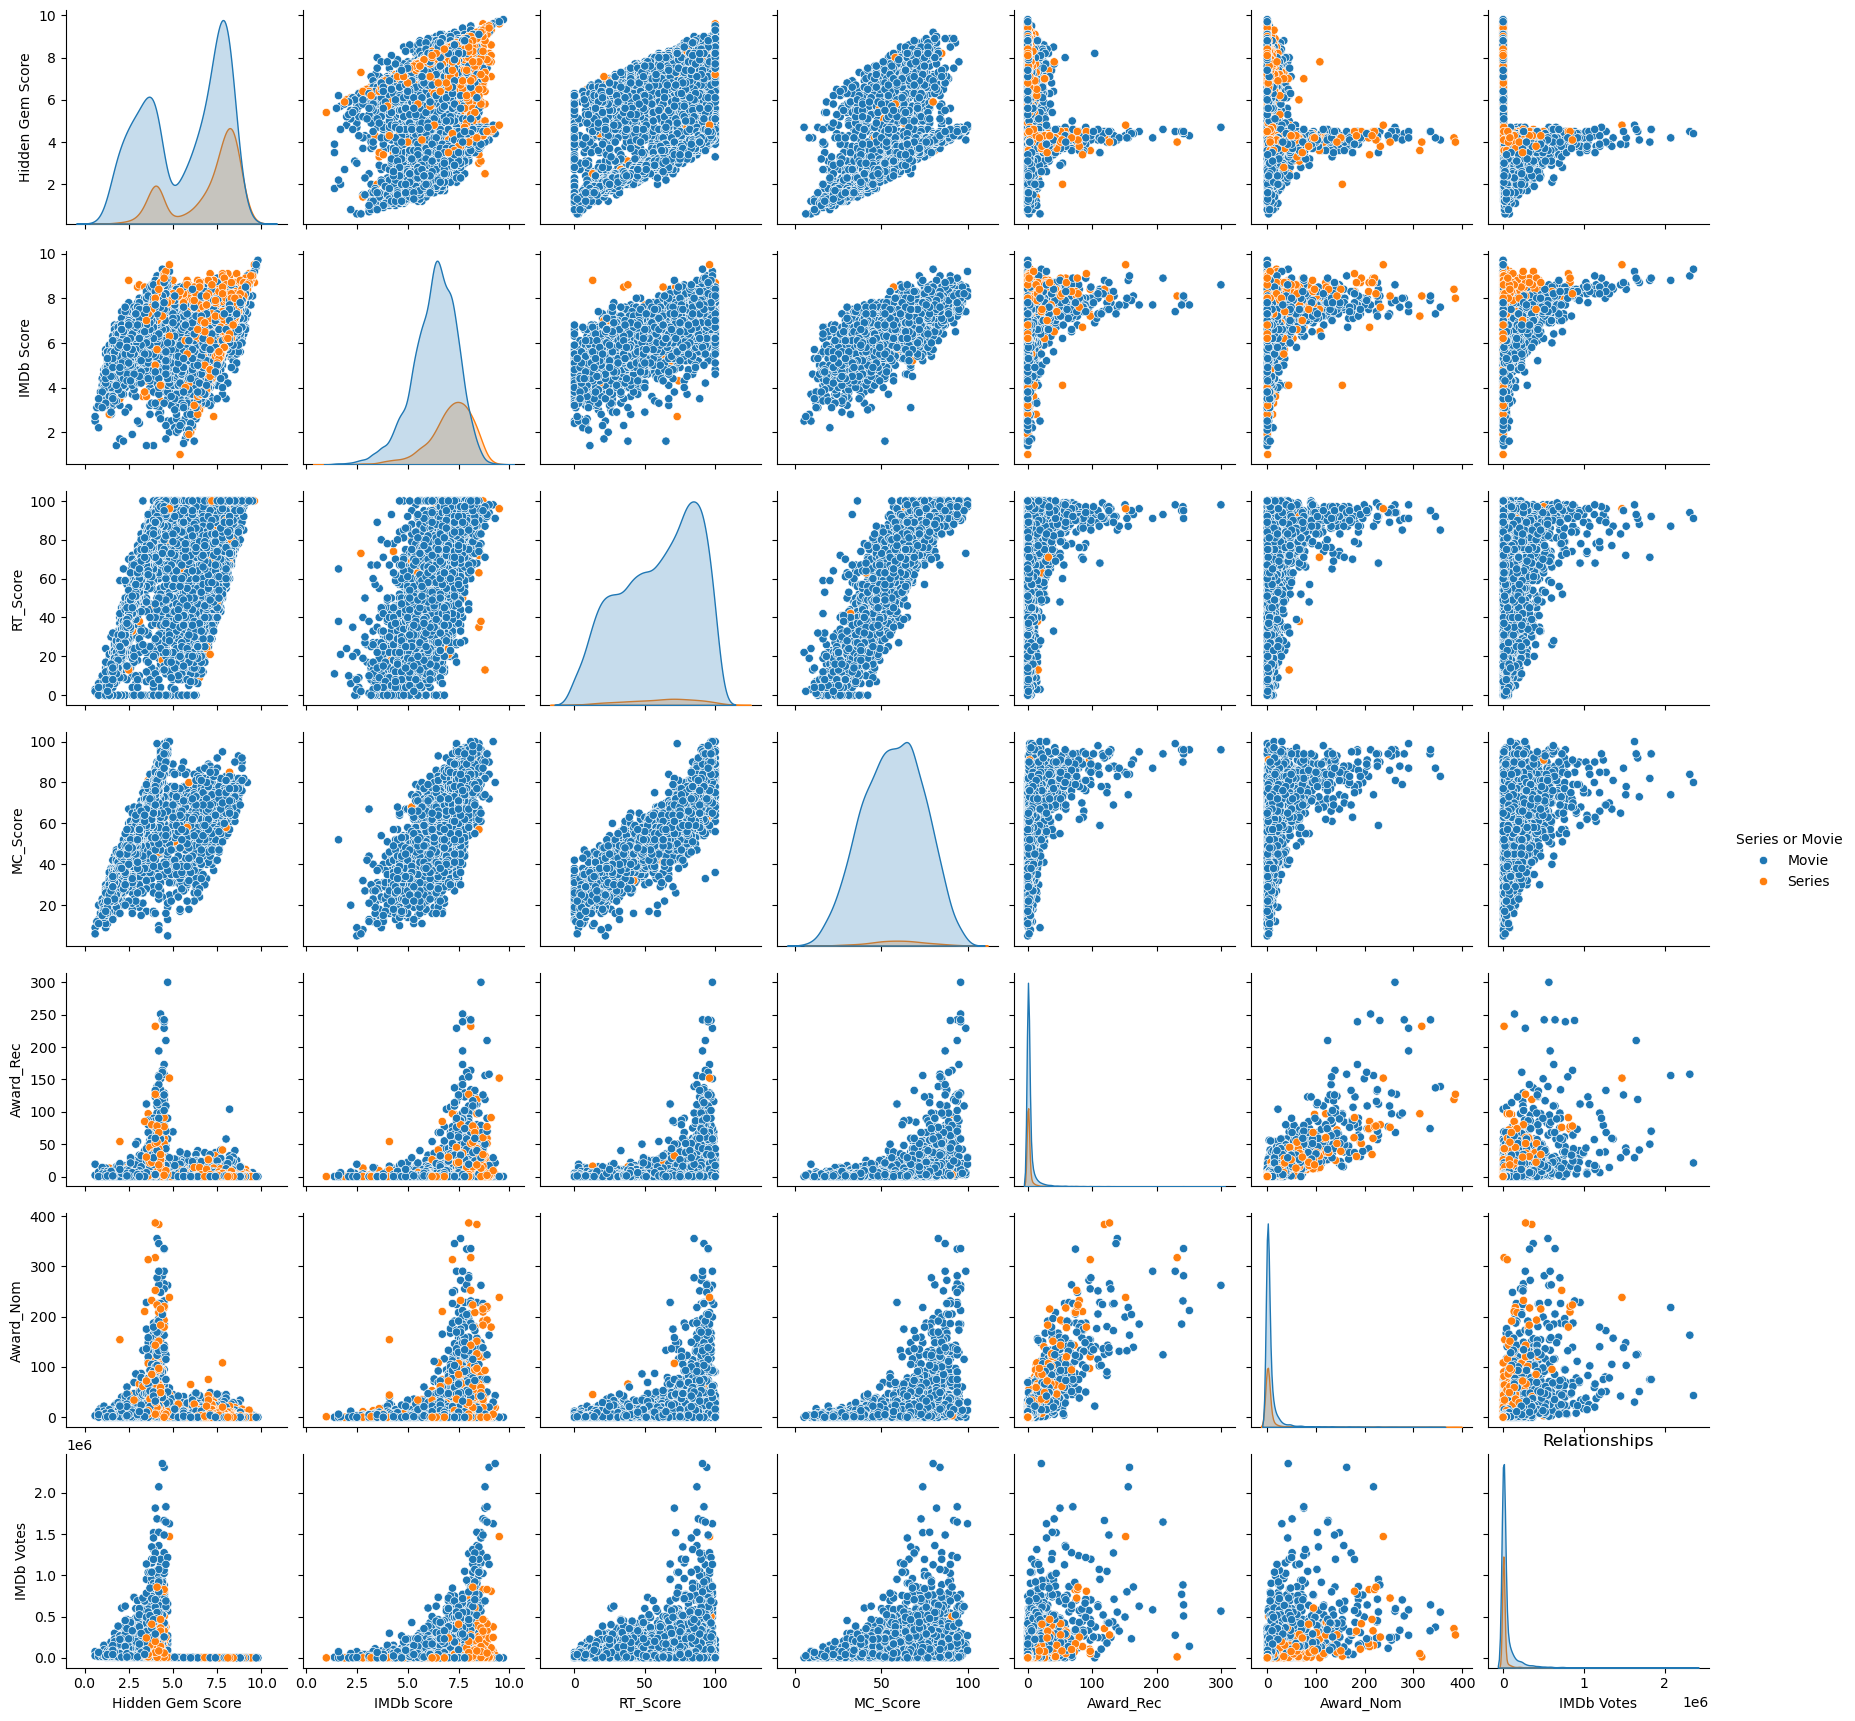

In [27]:
plt.figure()
sns.pairplot(df, hue='Series or Movie')
plt.title('Relationships')
plt.show()

<Axes: >

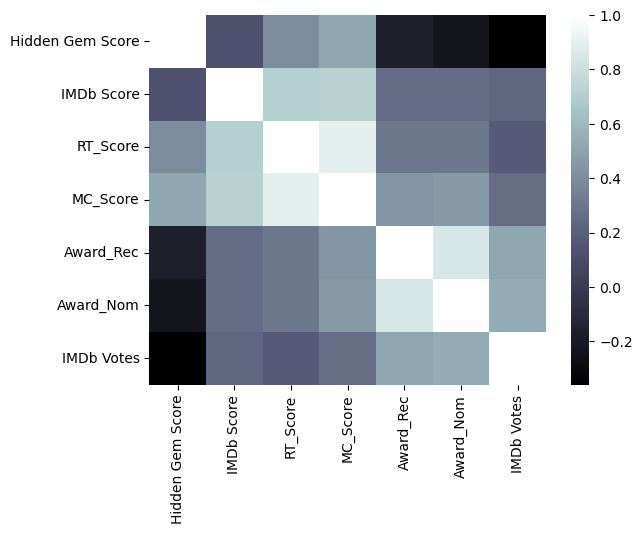

In [29]:
# compare numeric correlations
mycorr = df_num.corr(numeric_only=True)
sns.heatmap(mycorr, cmap='bone')


Generally correlations are as one would expect:
- More imdb votes generally <-> Higher imdb score
- More award noms/awarded <-> Higher imdb score
- Hidden Gem anticorrelated with IMDb, with cutoff for those with higher imdb votes.
- Slightly unusual lack of correlation between number of votes and awards, possibly due to many awards going to more arthouse, less "mainstream" movies.

Which suggests real insights likely to be drawn from categorical data, such as genres and regions.

Step 3: Deeper Exploration & Data Wrangling
----------

Want to be able to iterate over the df for each value in, e.g, genres, and group titles/rows by each value.

I.e., to ask and answer questions like "What is the distribution of genres on Netflix?", and "Do some genres tend to score higher in ratings?"

That means creating a dataframe of the column values - e.g., Genres - that has columns of the total occurrences and average ratings.


In [30]:
# genres as index
# str.count.sum as 'count' column
# then mean values of each other column - dict of {col : col.mean}
genre_cols = {'Count' : []}
counts = [] 
for i in genres:
    counts.append(df['Genre'].str.contains(i).sum())
    genre_cols['Count'] = counts


In [31]:
mask = df['Genre'].str.contains(i)
df[mask]['Hidden Gem Score'].mean()

8.337499999999999

In [32]:
for colname in list(df_num.columns):
    mean = []
    genre_cols[colname] = mean
    for i in genres:
        mask = df['Genre'].str.contains(i)
        mean.append(round(df[mask][colname].mean(),2))
    
genre_cols['IMDb Score']

[6.64,
 6.71,
 6.62,
 5.9,
 6.6,
 6.36,
 6.32,
 6.84,
 6.65,
 6.3,
 6.61,
 6.44,
 6.48,
 6.51,
 6.6,
 7.0,
 6.74,
 6.52,
 6.91,
 7.05,
 7.14,
 6.05,
 6.47,
 6.56,
 6.65,
 6.53,
 6.97,
 7.25,
 6.72]

In [34]:
# create df with unique values as index
genre_df = pd.DataFrame(genre_cols, index=genres)
genre_df

,Count,Hidden Gem Score,IMDb Score,RT_Score,MC_Score,Award_Rec,Award_Nom,IMDb Votes
Crime,1932,5.04,6.64,58.04,55.86,4.97,10.67,65684.33
Drama,6359,5.71,6.71,64.43,60.64,6.20,11.89,47275.73
Fantasy,1594,5.52,6.62,56.91,53.88,3.87,8.70,58361.80
Horror,1070,4.69,5.90,50.78,50.77,2.94,6.75,49294.01
Romance,2445,5.76,6.60,59.32,56.10,4.60,9.14,35895.25
Comedy,5077,5.92,6.36,56.68,53.51,2.74,5.94,31295.51
Thriller,2739,4.55,6.32,53.75,53.16,4.73,10.17,72099.16
Animation,1665,6.86,6.84,65.80,60.77,1.55,3.70,16845.08
Short,422,7.85,6.65,50.00,NaN,0.68,0.88,1977.46
Family,1433,6.09,6.30,56.42,54.59,2.51,5.85,27669.43


In [59]:
# ADD INDEX, and set genre as category?!

#sns.barplot(x=genre_df[0],y=genre_df['IMDb Score'])

KeyError: 0